In [2]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install geopandas
# !pip install plotly
# !pip install wkt

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import seaborn as sns
from shapely import wkt
import math
import json

In [2]:
df = pd.read_csv('datasets/nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [49]:
df.id.nunique() ==  df.id.count()

True

In [22]:
df[df.trip_duration > 18000] # поездки длинее 5 часов

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
15,id2930166,2,2016-02-21 01:56:14,2016-02-22 01:52:18,1,-74.002876,40.734131,-73.955399,40.767502,N,86164,5.457349,15788.619125
610,id2903714,2,2016-01-13 07:29:02,2016-01-14 00:00:00,6,-73.990753,40.730415,-73.968506,40.750965,N,59458,2.956335,20112.063810
1372,id2724397,2,2016-01-24 12:46:41,2016-01-25 00:00:00,1,-73.972191,40.754681,-73.776360,40.645866,N,40399,20.474330,1973.153670
3018,id1734527,2,2016-06-17 12:29:41,2016-06-18 12:28:43,1,-73.981789,40.746292,-73.984619,40.763962,N,86342,1.979812,43611.205831
3543,id1460495,2,2016-04-13 22:06:43,2016-04-14 22:02:28,1,-73.974472,40.753895,-73.971481,40.795464,N,86145,4.630543,18603.648101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726094,id3454276,2,2016-04-11 20:13:42,2016-04-12 20:06:24,5,-73.978630,40.762920,-73.947388,40.711311,N,85962,6.315553,13611.159170
726171,id0012592,2,2016-03-16 12:27:40,2016-03-17 11:50:48,1,-73.996918,40.752659,-74.003098,40.718094,N,84188,3.879776,21699.189449
726781,id3275402,2,2016-03-27 01:34:58,2016-03-28 01:30:21,1,-74.005913,40.742966,-73.978806,40.761127,N,86123,3.049261,28243.891142
727618,id1563790,2,2016-04-05 13:00:59,2016-04-06 12:50:00,1,-73.988434,40.753716,-74.000610,40.720901,N,85741,3.791427,22614.440117


**Поездки с 0 пассажиров**

In [13]:
zero_passengers = df[df.passenger_count == df.passenger_count.min()]
zero_passengers

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
3572,id3364866,1,2016-02-13 14:04:20,2016-02-13 14:21:29,0,-73.990479,40.742004,-73.989243,40.763680,N,1029
23847,id3485118,1,2016-05-11 19:15:57,2016-05-11 19:32:18,0,-73.987572,40.754566,-73.972031,40.762836,N,981
45987,id2571672,1,2016-03-06 05:24:55,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5
76998,id1253169,1,2016-02-28 01:08:48,2016-02-28 01:09:01,0,-74.035942,40.736488,-74.035942,40.736492,N,13
101709,id1220914,2,2016-01-17 20:51:55,2016-01-17 20:52:43,0,-73.959999,40.766861,-73.960106,40.766911,N,48
186050,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
186913,id3494250,1,2016-04-02 02:32:10,2016-04-02 02:50:51,0,-74.005089,40.729038,-74.032486,40.619579,N,1121
194926,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,2191
231010,id0959777,2,2016-03-01 19:11:26,2016-03-01 19:11:30,0,-74.003777,40.738186,-74.003807,40.738174,N,4
247692,id2891366,1,2016-02-18 21:26:15,2016-02-18 21:28:00,0,-73.983543,40.716404,-73.983543,40.716404,N,105


**Есть одна поездка с 9 пассажирами, хотя максимальное количество пассажирских мест - 7 (машина Toyota Sienna Accessible)**
Источники: [Машины в такси Нью-Йорка](https://en.wikipedia.org/wiki/Taxis_of_New_York_City#Approved_taxi_models), [Характеристики Toyota Sienna Accessible](https://www.drom.ru/catalog/toyota/sienna/299757)

In [16]:
df.passenger_count.max()  # максимальное количество пассажиров в такси

9

In [27]:
df[df.passenger_count == 9]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
629474,id2489742,2,2016-06-24 08:09:21,2016-06-24 08:18:41,9,-73.710632,40.671581,-73.710632,40.671581,N,560


In [4]:
pickup_longitude = df[['id', 'pickup_longitude']].rename(columns={'pickup_longitude': 'longitude'})
pickup_longitude['type'] = 'pickup'
dropoff_longitude = df[['id', 'dropoff_longitude']].rename(columns={'dropoff_longitude': 'longitude'})
dropoff_longitude['type'] = 'dropoff'
longitudes = pd.concat((pickup_longitude, dropoff_longitude))

In [5]:
pickup_latitude = df[['id', 'pickup_latitude']].rename(columns={'pickup_latitude': 'latitude'})
pickup_latitude['type'] = 'pickup'
dropoff_latitude = df[['id', 'dropoff_latitude']].rename(columns={'dropoff_latitude': 'latitude'})
dropoff_latitude['type'] = 'dropoff'

latitudes = pd.concat((pickup_latitude, dropoff_latitude))

In [6]:
coords = pd.merge(longitudes, latitudes, on=['id', 'type'])

In [7]:
coords.head()

,id,longitude,type,latitude
0,id1080784,-73.953918,pickup,40.778873
1,id0889885,-73.988312,pickup,40.731743
2,id0857912,-73.997314,pickup,40.721458
3,id3744273,-73.961670,pickup,40.759720
4,id0232939,-74.017120,pickup,40.708469


In [9]:
geo_coords = gpd.GeoDataFrame(coords, geometry=gpd.points_from_xy(coords.longitude, coords.latitude))

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [49]:
with open('datasets/NYC Taxi Zones.geojson') as f:
    taxi_zones = json.load(f)


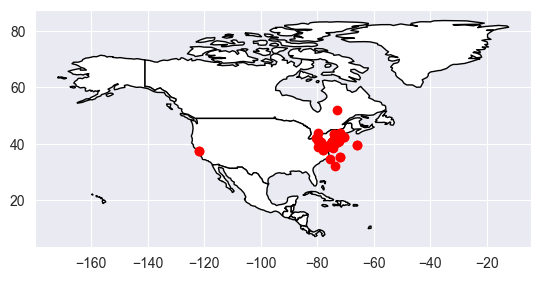

In [30]:
ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
geo_coords.plot(ax=ax, color='red') # Расположение точек начала и конца поездок
plt.show()

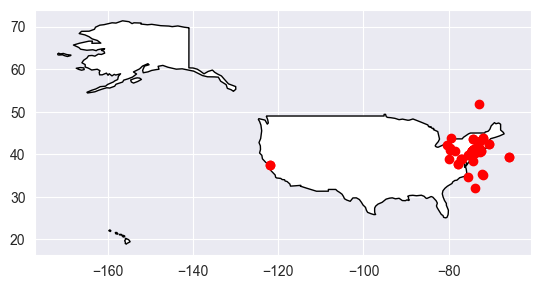

In [32]:
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor='black')
geo_coords.plot(ax=ax, color='red') # Расположение точек начала и конца поездок
plt.show()

Карта с точками и областями работы такси ниже (перед коммитом запустить без карты):

In [1]:
fig = px.scatter_mapbox(coords, lat='latitude', lon='longitude', hover_name='type')
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90})
fig.update_traces(cluster=dict(enabled=True))
fig.update_layout(
    mapbox = {
        'style': "open-street-map",
        'center': { 'lon': -73.9662, 'lat': 40.7834},
        'zoom': 9, 'layers': [{
            'source': taxi_zones,
            'type': "fill", 'below': "traces", 'color': "gray", 'name': 'Область работы такси',
        'opacity': 0.5}]},
    margin = {'l':0, 'r':0, 'b':0, 't':0})
fig.show()

**Присутствуют точки далеко выходящие за пределы Нью-Йорка (в том числе в другие города США, а также в Канаду (не в город, а просто в лес), а также в море)**

**Поездка с слишком большой длительностью**

In [34]:
df[df.trip_duration == df.trip_duration.max()]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
21813,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.78965,40.643559,-73.95681,40.773087,N,1939736


**Поездки с длительностью меньше 10 секунд**

In [35]:
df[df.trip_duration < 10]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
136,id1514658,1,2016-03-22 08:23:09,2016-03-22 08:23:16,2,-73.902054,40.764011,-73.902061,40.764023,N,7
448,id1326538,2,2016-03-18 12:19:33,2016-03-18 12:19:42,1,-73.974197,40.762718,-73.975693,40.760723,N,9
3169,id1620472,1,2016-02-18 03:22:38,2016-02-18 03:22:40,1,-73.957687,40.718021,-73.957687,40.718025,N,2
3417,id3499474,2,2016-06-25 20:22:29,2016-06-25 20:22:37,5,-73.936859,40.764721,-73.936821,40.764751,N,8
4079,id3224766,2,2016-05-14 00:04:08,2016-05-14 00:04:15,6,-73.958549,40.800159,-73.959923,40.798420,N,7
...,...,...,...,...,...,...,...,...,...,...,...
723266,id0701838,1,2016-02-11 21:35:27,2016-02-11 21:35:30,1,-73.956413,40.775345,-73.956421,40.775333,N,3
723470,id0741320,1,2016-03-16 12:13:08,2016-03-16 12:13:17,1,-73.942169,40.751625,-73.942169,40.751625,N,9
725293,id3396117,2,2016-03-23 22:17:59,2016-03-23 22:18:05,1,-74.007912,40.744621,-74.007912,40.744621,N,6
726045,id1327840,1,2016-01-26 18:08:43,2016-01-26 18:08:52,1,-73.932747,40.751091,-73.932739,40.751095,N,9


In [42]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
...,...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447


In [58]:
def get_distance(p1, p2):
    # p1 и p2 - это кортежи из двух элементов - координаты точек
    radius = 6373.0

    lon1 = math.radians(p1[0])
    lat1 = math.radians(p1[1])
    lon2 = math.radians(p2[0])
    lat2 = math.radians(p2[1])

    d_lon = lon2 - lon1
    d_lat = lat2 - lat1

    a = math.sin(d_lat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(d_lon / 2) ** 2
    c = 2 * math.atan2(a ** 0.5, (1 - a) ** 0.5)

    distance = radius * c
    return distance

In [59]:
df['distance'] = df.apply(lambda x: get_distance((x.pickup_longitude, x.pickup_latitude), (x.dropoff_longitude, x.dropoff_latitude)), axis=1)

In [60]:
df[['trip_duration', 'distance']].corr()

,trip_duration,distance
trip_duration,1.000000,0.125772
distance,0.125772,1.000000


In [61]:
df['avg_speed'] = df.distance /  df.trip_duration * 3600 # км / ч

**Поездки с нулевыми дистанциями (если время маленькое, то возможно ошибочный или отменённый заказ, а большой может быть в ту же точку, но с остановками в других местах, или же аномалии)**

In [46]:
df[df.distance == 0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed
263,id3155891,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,0.0,0.0
327,id0786923,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,159,0.0,0.0
795,id2323213,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,897,0.0,0.0
1176,id3235868,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,256,0.0,0.0
1257,id1865738,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
728720,id3423342,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,14,0.0,0.0
728775,id2618105,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,464,0.0,0.0
728838,id1232120,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,421,0.0,0.0
729025,id3524028,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,1369,0.0,0.0


In [8]:
df[df.avg_speed > 100]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed
448,id1326538,2,2016-03-18 12:19:33,2016-03-18 12:19:42,1,-73.974197,40.762718,-73.975693,40.760723,N,9,0.255180,102.072193
4079,id3224766,2,2016-05-14 00:04:08,2016-05-14 00:04:15,6,-73.958549,40.800159,-73.959923,40.798420,N,7,0.225405,115.922364
13896,id0267475,2,2016-01-13 00:25:32,2016-01-13 00:25:44,1,-73.962646,40.760399,-73.953773,40.756439,N,12,0.867670,260.301080
26008,id0868400,2,2016-04-15 13:52:42,2016-04-15 13:53:42,1,-73.951378,40.770161,-73.985504,40.723377,N,60,5.945468,356.728088
40186,id1367936,2,2016-06-05 00:38:28,2016-06-05 00:38:31,1,-73.978363,40.729126,-73.978760,40.728424,N,3,0.084933,101.919606
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656026,id0336739,1,2016-01-26 18:50:50,2016-01-26 19:01:27,1,-73.794510,40.657055,-73.971497,40.761551,N,637,18.915140,106.898751
659404,id2815938,1,2016-01-04 12:16:27,2016-01-04 12:25:12,1,-74.181610,40.719952,-73.993011,40.713158,N,525,15.917978,109.151850
691498,id2487275,1,2016-03-20 11:47:20,2016-03-20 11:49:21,2,-73.792923,40.662743,-73.987946,40.759075,N,121,19.626118,583.917560
695286,id0401529,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.980751,40.757111,-74.240051,38.478298,N,804,254.443373,1139.298685


**86 поездок со средней скоростью более 100 км/ч**
поездка id2306955 является поездок в канаду (причём в лес)
поездка id0116374 в Вашингтон

In [62]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [63]:
df.pickup_datetime.min(), df.pickup_datetime.max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

In [64]:
df['pickup_month'] = df.pickup_datetime.dt.month
df['dropoff_month'] = df.dropoff_datetime.dt.month

In [65]:
df.pickup_month.unique()

array([2, 3, 1, 4, 6, 5])

Text(0, 0.5, 'Количество поездок')

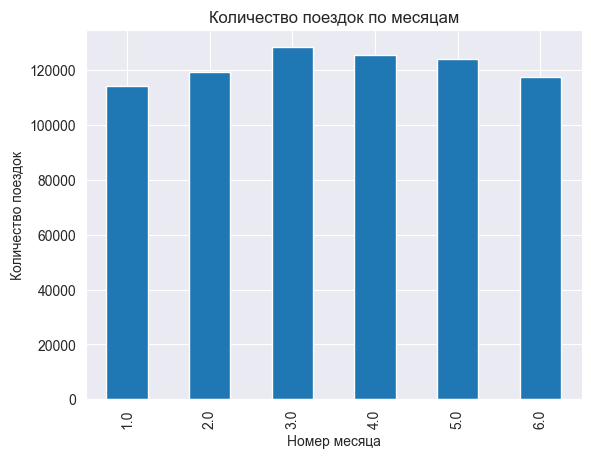

In [32]:
df.groupby('pickup_month')['id'].count().plot.bar()
plt.title('Количество поездок по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

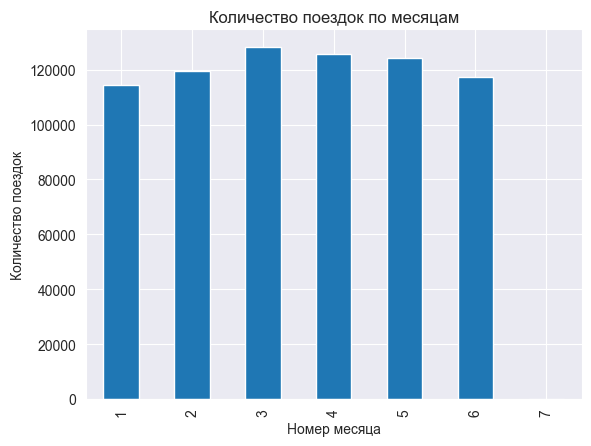

In [7]:
df.groupby('dropoff_month')['id'].count().plot.bar()
plt.title('Количество поездок по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество поездок')

Больше поездок в марте
Количество начал и концов поездок по месяцам примерно совпадает

In [66]:
df['pickup_weekday'] = df.pickup_datetime.dt.weekday
df['dropoff_weekday'] = df.dropoff_datetime.dt.weekday


Text(0, 0.5, 'Количество поездок')

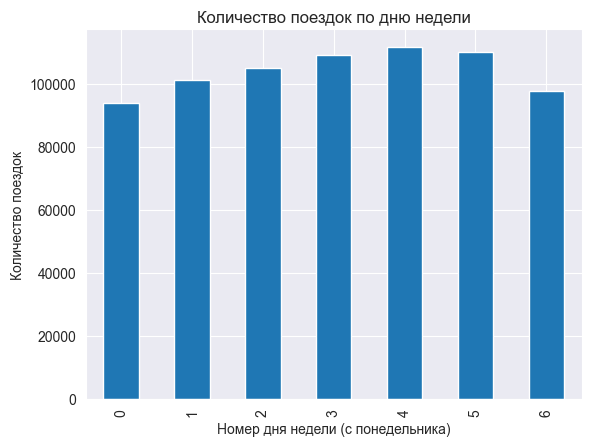

In [9]:
df.groupby('pickup_weekday')['id'].count().plot.bar()
plt.title('Количество поездок по дню недели')
plt.xlabel('Номер дня недели (с понедельника)')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

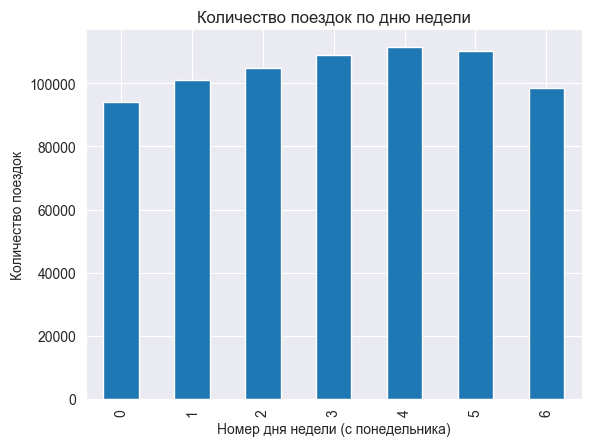

In [10]:
df.groupby('dropoff_weekday')['id'].count().plot.bar()
plt.title('Количество поездок по дню недели')
plt.xlabel('Номер дня недели (с понедельника)')
plt.ylabel('Количество поездок')

Больше всего поездок в пятницу
Количество начал и концов поездок примерно одинаковое

In [12]:
def part_day(hour):
    if 0 <= hour <= 5:
        return 'night'
    if 6 <= hour <= 11:
        return 'morning'
    if 12 <= hour <= 17:
        return 'day'
    return 'evening'

In [13]:
df['part_day_pickup'] = df.apply(lambda x: part_day(x.pickup_datetime.hour), axis=1)
df['part_day_dropoff'] = df.apply(lambda x: part_day(x.dropoff_datetime.hour), axis=1)

Text(0, 0.5, 'Количество поездок')

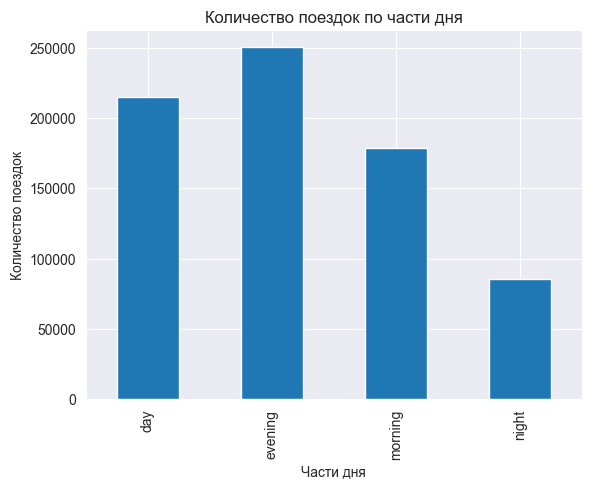

In [13]:
df.groupby('part_day_pickup')['id'].count().plot.bar()
plt.title('Количество поездок по части дня')
plt.xlabel('Части дня')
plt.ylabel('Количество поездок')

Text(0, 0.5, 'Количество поездок')

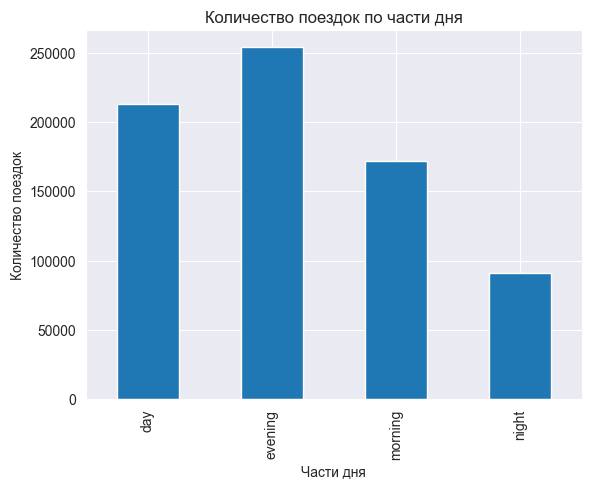

In [17]:
df.groupby('part_day_dropoff')['id'].count().plot.bar()
plt.title('Количество поездок по части дня')
plt.xlabel('Части дня')
plt.ylabel('Количество поездок')

Больше всего поездок совершается вечером
Количество начал и концов поездок примерно одинаково

In [14]:
df['pickup_month_weekday'] = df.apply(lambda x: str(x.pickup_month) + ' ' + str(x.pickup_weekday), axis=1)
df['dropoff_month_weekday'] = df.apply(lambda x: str(x.dropoff_month) + ' ' + str(x.dropoff_weekday), axis=1)

<Axes: xlabel='month_weekday'>

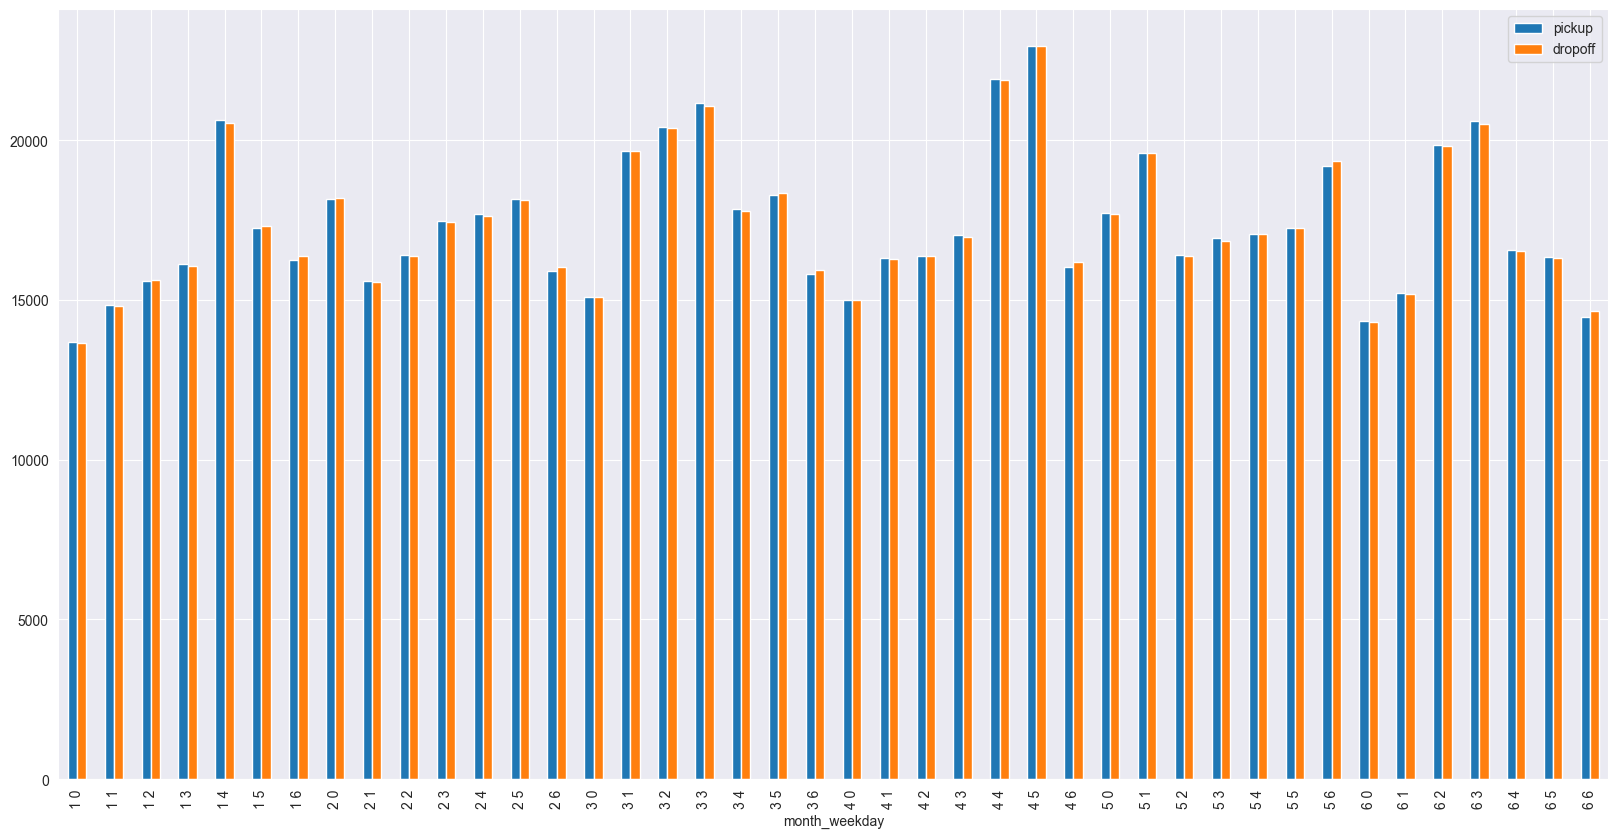

In [27]:
pickup_month_weekday = df.groupby('pickup_month_weekday', as_index=False)['id'].count().rename(columns={'id': 'pickup', 'pickup_month_weekday': 'month_weekday'})
dropoff_month_weekday = df.groupby('dropoff_month_weekday', as_index=False)['id'].count().rename(columns={'id': 'dropoff', 'dropoff_month_weekday': 'month_weekday'})
pickup_month_weekday.merge(dropoff_month_weekday, on='month_weekday').plot.bar(x='month_weekday', y=['pickup', 'dropoff'], figsize=(20, 10))

Количество начал и концов поездок примерно одинаково, поэтому далее будет только начало


Text(0, 0.5, 'Количество поездок')

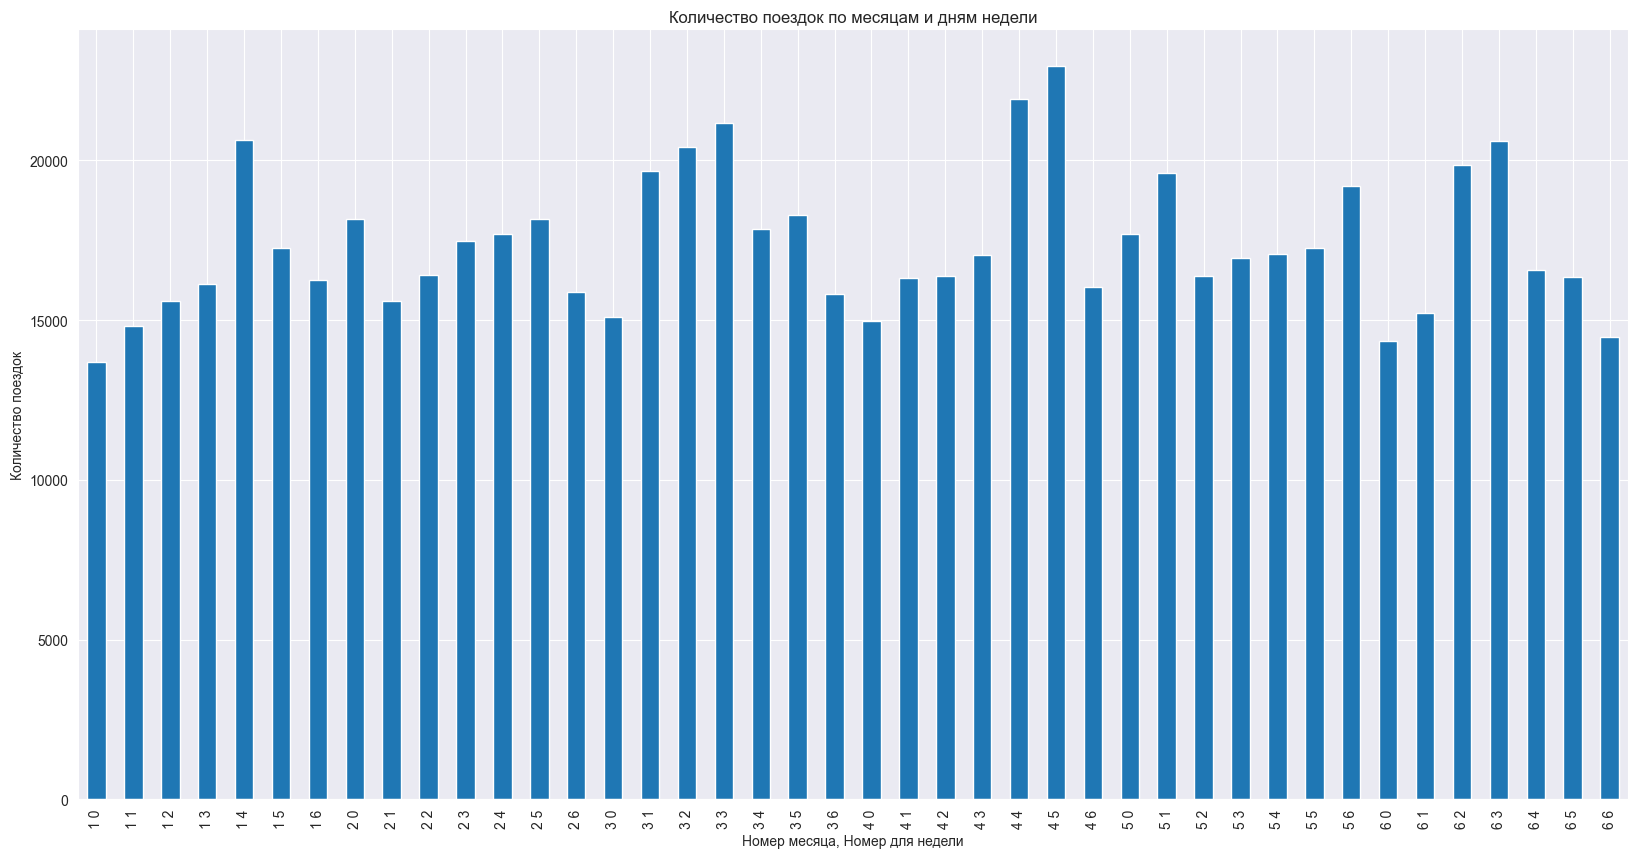

In [30]:
df.groupby('pickup_month_weekday')['id'].count().plot.bar(figsize=(20, 10))
plt.title('Количество поездок по месяцам и дням недели')
plt.xlabel('Номер месяца, Номер для недели')
plt.ylabel('Количество поездок')

Видно, что далеко не каждый месяц самый популяный день меняется, но он выпадает на второю половину недели (с четверга по воскресенье)

In [86]:
weather = pd.read_csv('datasets/nyc_2016_weather.csv')

In [69]:
weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [70]:
weather['date'] = pd.to_datetime(weather.date, format='%d-%m-%Y')

In [71]:
df['date_str'] = df.pickup_datetime.dt.date
weather['date_str'] = weather.date.dt.date
weather['precipitation'] = weather['precipitation'].replace('T', 0).astype('float64')
weather['snow fall'] = weather['snow fall'].replace('T', 0).astype('float64')
weather['snow depth'] = weather['snow depth'].replace('T', 0).astype('float64')

In [72]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,avg_speed,pickup_month,dropoff_month,pickup_weekday,dropoff_weekday,date_str
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199449,10.795041,2,2,0,0,2016-02-29
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.130407,13.517696,3,3,4,4,2016-03-11
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.253029,15.969972,2,2,6,6,2016-02-21
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361839,7.451901,1,1,1,1,2016-01-05
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.329893,18.381620,2,2,2,2,2016-02-17


In [73]:
df = df.merge(weather, on='date_str', how='inner')

In [115]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_weekday,dropoff_weekday,date_str,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,2016-02-29,2016-02-29,61,47,54.0,0.05,0.0,0.0
1,id1520195,2,2016-02-29 08:48:00,2016-02-29 09:13:47,1,-73.982536,40.745682,-74.011017,40.714664,N,...,0,0,2016-02-29,2016-02-29,61,47,54.0,0.05,0.0,0.0
2,id0773686,2,2016-02-29 18:05:21,2016-02-29 18:29:20,1,-73.990868,40.696159,-73.972481,40.642429,N,...,0,0,2016-02-29,2016-02-29,61,47,54.0,0.05,0.0,0.0
3,id1845596,1,2016-02-29 07:55:42,2016-02-29 08:00:02,1,-73.961411,40.771584,-73.972900,40.759209,N,...,0,0,2016-02-29,2016-02-29,61,47,54.0,0.05,0.0,0.0
4,id3563947,1,2016-02-29 17:11:40,2016-02-29 17:21:03,1,-73.988045,40.732067,-74.005653,40.745049,N,...,0,0,2016-02-29,2016-02-29,61,47,54.0,0.05,0.0,0.0


In [76]:
df.precipitation.unique()

array([0.05, 0.06, 0.03, 0.  , 0.38, 0.07, 0.01, 0.29, 0.09, 1.22, 0.02,
       0.14, 0.04, 0.24, 0.91, 1.65, 0.54, 0.16, 0.45, 0.47, 0.22, 0.3 ,
       0.4 , 0.11, 0.61, 0.2 , 0.25, 0.53, 1.01, 0.73, 0.44, 1.8 , 0.12,
       0.18, 2.31])

In [77]:
df[['avg_speed', 'trip_duration', 'precipitation', 'snow fall', 'snow depth']].corr()

,avg_speed,trip_duration,precipitation,snow fall,snow depth
avg_speed,1.000000,-0.028189,0.010288,-0.001620,-0.016427
trip_duration,-0.028189,1.000000,-0.003554,0.001726,0.003867
precipitation,0.010288,-0.003554,1.000000,0.332329,-0.028061
snow fall,-0.001620,0.001726,0.332329,1.000000,0.083545
snow depth,-0.016427,0.003867,-0.028061,0.083545,1.000000


Text(0.5, 0, 'Дата')

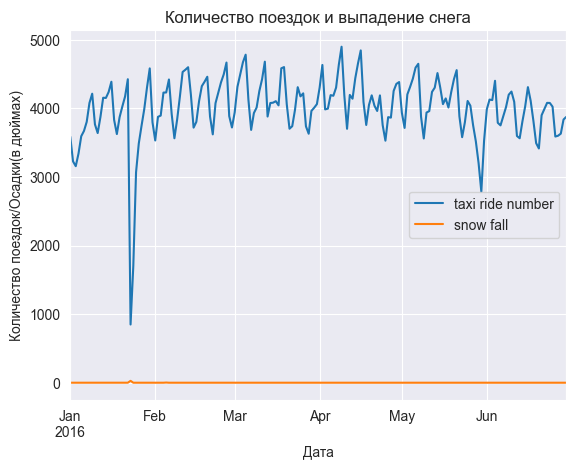

In [109]:
df.groupby('date', as_index=False)[['id', 'snow fall']].agg({'id': 'count', 'snow fall': 'mean'})\
    .rename(columns={'id': 'taxi ride number'}).plot.line(x='date', y=['taxi ride number', 'snow fall'])
plt.title('Количество поездок и выпадение снега')
plt.ylabel('Количество поездок/Осадки(в дюймах)')
plt.xlabel('Дата')

In [92]:
taxis_snow = df.groupby('date', as_index=False)[['id', 'snow fall']].agg({'id': 'count', 'snow fall': 'mean'}).rename(columns={'id': 'taxi ride number'})

In [100]:
taxis_snow['taxi ride number'] = (taxis_snow['taxi ride number'] - taxis_snow['taxi ride number'].mean()) /  taxis_snow['taxi ride number'].std()

In [101]:
taxis_snow['snow fall'] = (taxis_snow['snow fall'] - taxis_snow['snow fall'].mean()) / taxis_snow['snow fall'].std()

Text(0.5, 0, 'Дата')

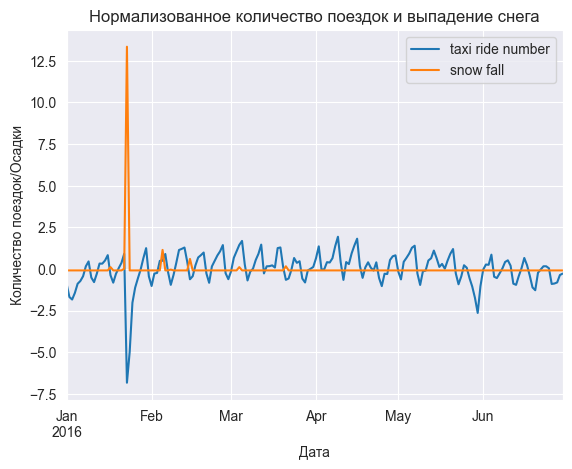

In [113]:
taxis_snow.plot.line(x='date', y=['taxi ride number', 'snow fall'])
plt.title('Нормализованное количество поездок и выпадение снега')
plt.ylabel('Количество поездок/Осадки')
plt.xlabel('Дата')

Падение в конце января обусловлено [снежной бурей и запретом автомобильного движения](https://ria.ru/20160123/1364032228.html)

In [120]:
taxis_rain = df.groupby('date', as_index=False)[['id', 'precipitation']].agg({'id': 'count', 'precipitation': 'mean'}).rename(columns={'id': 'taxi ride number'})\
    .rename(columns={'id': 'taxi ride number'})

In [121]:
taxis_rain['taxi ride number'] = (taxis_rain['taxi ride number'] - taxis_rain['taxi ride number'].mean()) /  taxis_rain['taxi ride number'].std()
taxis_rain['precipitation'] = (taxis_rain['precipitation'] - taxis_rain['precipitation'].mean()) / taxis_rain['precipitation'].std()

Text(0.5, 1.0, 'Нормализованное количество поездок и выпадения осадков')

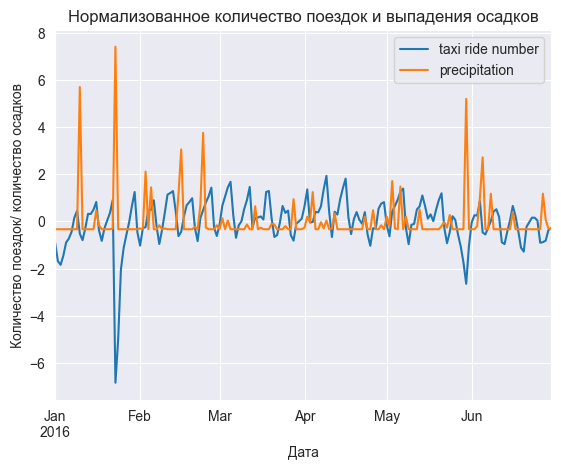

In [123]:
taxis_rain.plot.line(x='date', y=['taxi ride number', 'precipitation'])
plt.xlabel('Дата')
plt.ylabel('Количество поездок/ количество осадков')
plt.title('Нормализованное количество поездок и выпадения осадков')

In [127]:
taxis_rain[['taxi ride number', 'precipitation']].corr()

,taxi ride number,precipitation
taxi ride number,1.000000,-0.366153
precipitation,-0.366153,1.000000


In [128]:
taxis_rain[taxis_rain.date > datetime(2016, 1, 30)][['taxi ride number', 'precipitation']].corr()

,taxi ride number,precipitation
taxi ride number,1.000000,-0.196589
precipitation,-0.196589,1.000000


Есть очень слабая корреляция между выпадением осадков и количеством поездок

In [227]:
df.groupby('vendor_id')['id'].count()

vendor_id
1    338841
2    390481
Name: id, dtype: int64

In [135]:
df.groupby(['pickup_month', 'vendor_id'])['id'].count() # vendor 2 совершает больше поездок

pickup_month  vendor_id
1             1            52660
              2            61741
2             1            55151
              2            64213
3             1            59394
              2            68922
4             1            58786
              2            66848
5             1            57928
              2            66273
6             1            54922
              2            62484
Name: id, dtype: int64

In [139]:
df.groupby('vendor_id')[['trip_duration', 'distance']].mean()

,trip_duration,distance
vendor_id,,
1,837.096021,3.411788
2,1052.136219,3.468626


<Axes: title={'center': 'trip_duration'}, xlabel='vendor_id'>

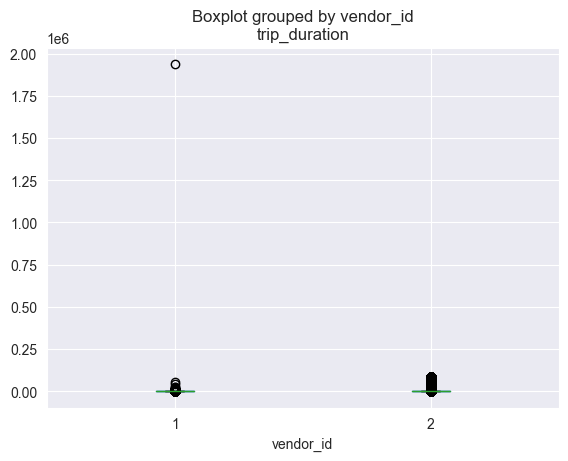

In [167]:
df.boxplot(column='trip_duration', by='vendor_id')

(0.0, 100000.0)

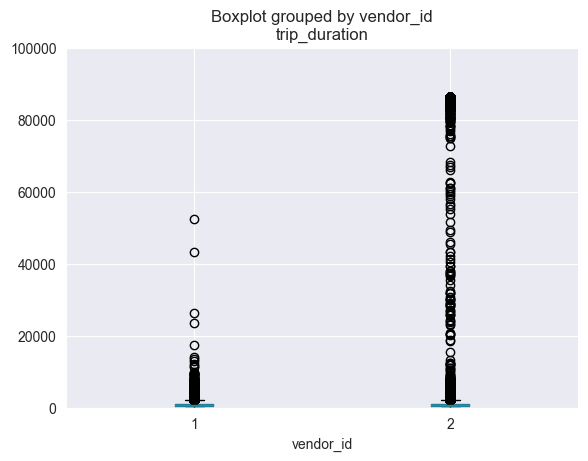

In [166]:
df.boxplot(column='trip_duration', by='vendor_id')
plt.ylim(0, 100000)

(0.0, 1000.0)

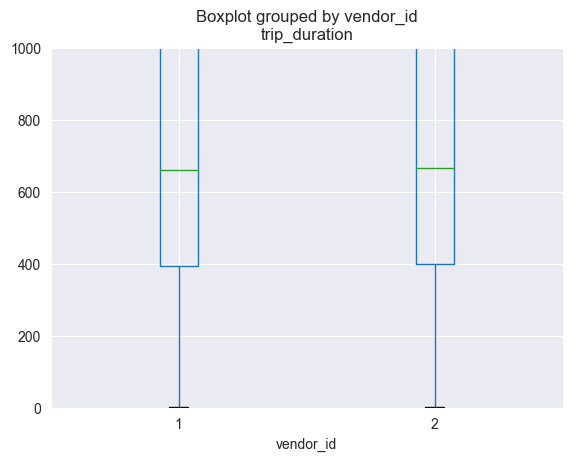

In [171]:
df.boxplot(column='trip_duration', by='vendor_id')
plt.ylim(0, 1000)

In [201]:
df[df.trip_duration > 10000].groupby('vendor_id')['id'].count()

vendor_id
1      12
2    1021
Name: id, dtype: int64

У обоих вендоров медианное значение длительности поездки примерно одинаково(~700), при этом самая длинная поездка у вендора 1, при этом количество сильных выбросов у 2 вендора намного больше

In [230]:
df.groupby('store_and_fwd_flag')[['distance', 'trip_duration']].median()

,distance,trip_duration
store_and_fwd_flag,,
N,2.094000,662.0
Y,2.666609,825.0
